<a href="https://colab.research.google.com/github/prerit2010/ML-Codes/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
df = pd.read_csv('train (1).csv')

In [43]:
df.shape

(891, 12)

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check the target class distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


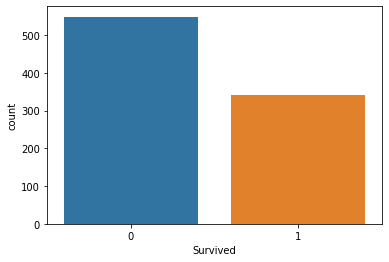

In [46]:
sns.countplot(df['Survived'])

### Check for null values in the dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Remove unnecessary/not useful features

In [55]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### List down the categorical and numerical features

In [56]:
df._get_numeric_data().columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [57]:
## categorical : Sex, Cabin, embarked

In [58]:
## ordinal : Pclass

### Plot distributions for columns

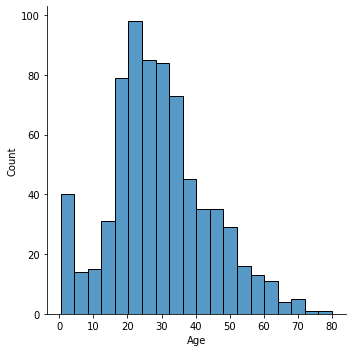

In [38]:
sns.displot(df['Age'])

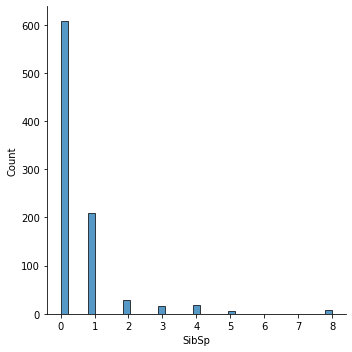

In [62]:
sns.displot(df['SibSp']) # of siblings / spouses aboard the Titanic

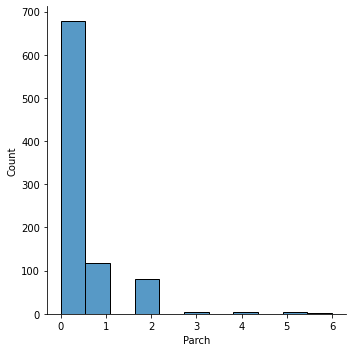

In [63]:
sns.displot(df['Parch']) # of parents / children aboard the Titanic	

(0.0, 100.0)

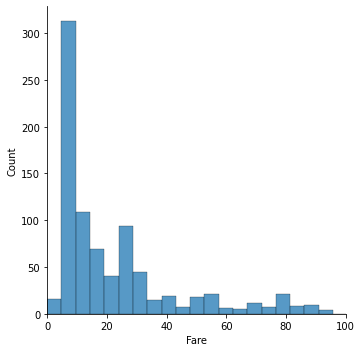

In [93]:

sns.displot(df['Fare'])
plt.xlim(0, 100)

In [65]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


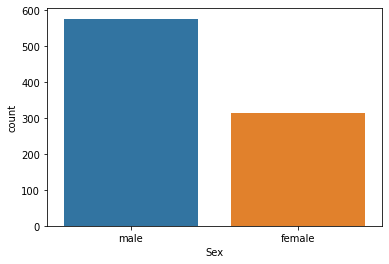

In [69]:
sns.countplot(df['Sex'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


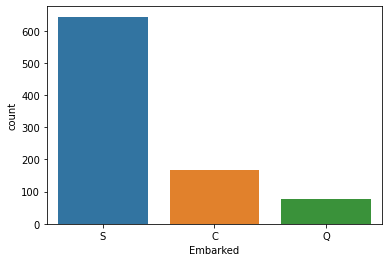

In [70]:
sns.countplot(df['Embarked'])

### find Correlation in the data

In [72]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


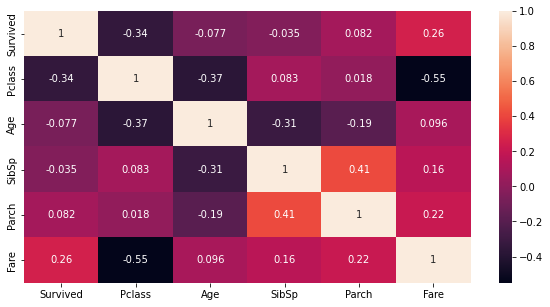

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

### Can restrict the correlation values to see highly correlated features

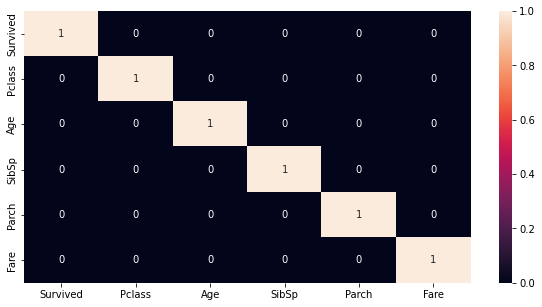

In [88]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr()>0.5, annot=True)

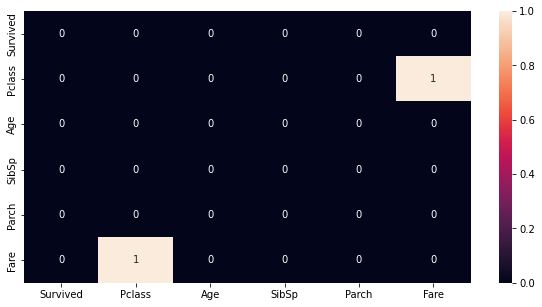

In [89]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr()<-0.5, annot=True)

### For numerical feature vs Categorical (target), use scatter plot

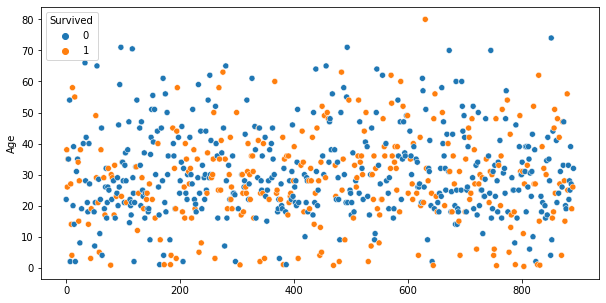

In [99]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x=df.index, y='Age', hue='Survived')

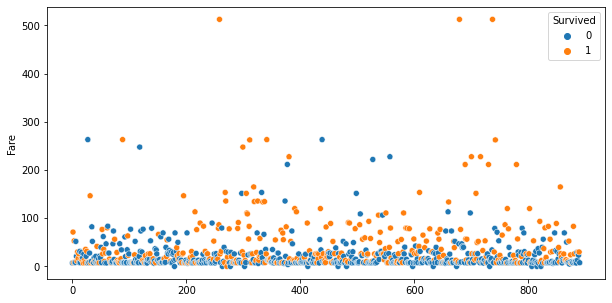

In [100]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x=df.index, y='Fare', hue='Survived')

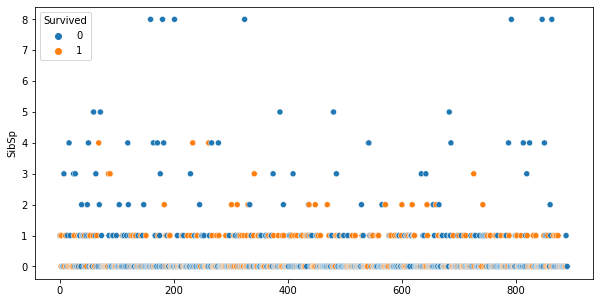

In [103]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x=df.index, y='SibSp', hue='Survived')

### Can use Count plots with hue for Categorical variable vs Categorical target

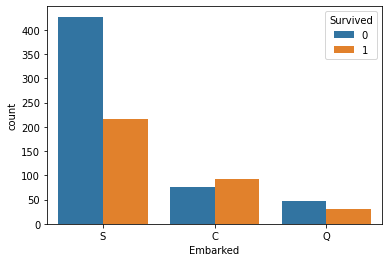

In [111]:
sns.countplot(data=df, x='Embarked', hue='Survived')

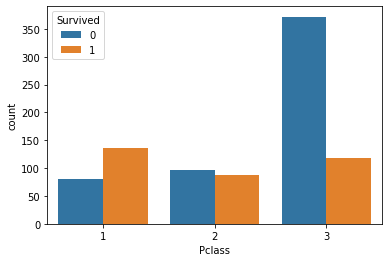

In [112]:
sns.countplot(data=df, x='Pclass', hue='Survived')

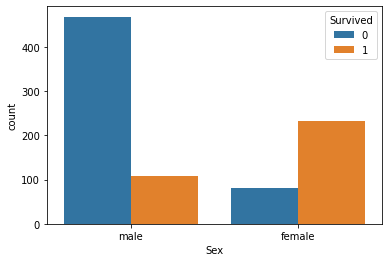

In [113]:
sns.countplot(data=df, x='Sex', hue='Survived')

### Impute the missing values using mean, median, mode, Regression, DT

In [110]:
df['Age'].mean()

29.69911764705882

In [107]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

### Min-Max Scale (normalize) or Standardize the numeric features

In [116]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaled_features = scaler.fit_transform(df[['Fare', 'SibSp', 'Parch', 'Fare', 'Age', 'Pclass']])

In [139]:
df_scaled = pd.DataFrame(scaled_features, columns = ['Fare', 'SibSp', 'Parch', 'Fare', 'Age', 'Pclass'], index=df.index)

In [140]:
df_scaled

,Fare,SibSp,Parch,Fare,Age,Pclass
0,-0.502445,0.432793,-0.473674,-0.502445,-0.592481,0.827377
1,0.786845,0.432793,-0.473674,0.786845,0.638789,-1.566107
2,-0.488854,-0.474545,-0.473674,-0.488854,-0.284663,0.827377
3,0.420730,0.432793,-0.473674,0.420730,0.407926,-1.566107
4,-0.486337,-0.474545,-0.473674,-0.486337,0.407926,0.827377
...,...,...,...,...,...,...
886,-0.386671,-0.474545,-0.473674,-0.386671,-0.207709,-0.369365
887,-0.044381,-0.474545,-0.473674,-0.044381,-0.823344,-1.566107
888,-0.176263,0.432793,2.008933,-0.176263,0.000000,0.827377
889,-0.044381,-0.474545,-0.473674,-0.044381,-0.284663,-1.566107


### One hot Encode the categorical variables

In [141]:
one_hot_encoded = pd.get_dummies(df[['Sex', 'Embarked']], columns=['Sex', 'Embarked'])

In [142]:
one_hot_encoded

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


### Combine the categorical and numerical features

In [143]:
df_features = pd.concat([df_scaled, one_hot_encoded], axis=1)

In [144]:
df_features

,Fare,SibSp,Parch,Fare,Age,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.502445,0.432793,-0.473674,-0.502445,-0.592481,0.827377,0,1,0,0,1
1,0.786845,0.432793,-0.473674,0.786845,0.638789,-1.566107,1,0,1,0,0
2,-0.488854,-0.474545,-0.473674,-0.488854,-0.284663,0.827377,1,0,0,0,1
3,0.420730,0.432793,-0.473674,0.420730,0.407926,-1.566107,1,0,0,0,1
4,-0.486337,-0.474545,-0.473674,-0.486337,0.407926,0.827377,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.386671,-0.474545,-0.473674,-0.386671,-0.207709,-0.369365,0,1,0,0,1
887,-0.044381,-0.474545,-0.473674,-0.044381,-0.823344,-1.566107,1,0,0,0,1
888,-0.176263,0.432793,2.008933,-0.176263,0.000000,0.827377,1,0,0,0,1
889,-0.044381,-0.474545,-0.473674,-0.044381,-0.284663,-1.566107,0,1,1,0,0


In [146]:
labels = df['Survived']

### Train test split the dataset

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(df_features, labels, test_size=0.2)

### Import and train the models

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [173]:
clf = LogisticRegression()
# clf = DecisionTreeClassifier()
# clf = SVC()

In [174]:
clf.fit(X_train, Y_train)

LogisticRegression()

### Evaluate the model using accuracy score / Confusion matrix

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [176]:
print(accuracy_score(Y_test, clf.predict(X_test)))

0.8268156424581006


In [156]:
cm = confusion_matrix(Y_test, clf.predict(X_test))

In [159]:
print(confusion_matrix(Y_test, clf.predict(X_test), labels=[0,1]))

[[95 10]
 [21 53]]


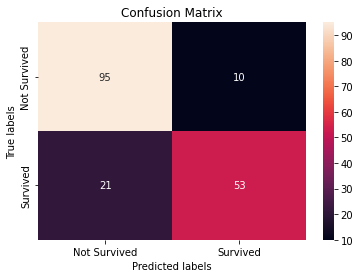

In [160]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Survived', 'Survived']); ax.yaxis.set_ticklabels(['Not Survived', 'Survived']);